In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv('titanic_toy.csv')

In [13]:
df.sample(5)

,Age,Fare,Family,Survived
193,3.0,26.0000,2,1
570,62.0,10.5000,0,1
210,24.0,7.0500,0,0
74,32.0,56.4958,0,1
274,NaN,7.7500,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [17]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [25]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [31]:
x_train.isnull().mean()

Age       0.185393
Fare      0.078652
Family    0.000000
dtype: float64

In [33]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [37]:
x_train['median_age']=df['Age'].fillna(median_age)
x_train['mean_age']=df['Age'].fillna(mean_age)

x_train['median_fare']=df['Fare'].fillna(median_fare)
x_train['mean_fare']=df['Fare'].fillna(mean_fare)

In [41]:
x_train.sample(5)

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
379,19.0,7.7750,0,19.0,19.000000,7.7750,7.775000
738,NaN,7.8958,0,30.0,30.355172,7.8958,7.895800
95,NaN,8.0500,0,30.0,30.355172,8.0500,8.050000
20,35.0,26.0000,0,35.0,35.000000,26.0000,26.000000
698,49.0,NaN,2,49.0,49.000000,13.0000,28.588387


In [47]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['median_age'].var())
print('Age Variance after mean imputation: ', x_train['mean_age'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['median_fare'].var())
print('Fare Variance after mean imputation: ', x_train['mean_fare'].var())

Original Age variable variance:  164.50587792145592
Age Variance after median imputation:  133.85444926045844
Age Variance after mean imputation:  133.8352905123709
Original Fare variable variance:  1370.9045036348664
Fare Variance after median imputation:  1280.1798467750332
Fare Variance after mean imputation:  1262.4713790535777


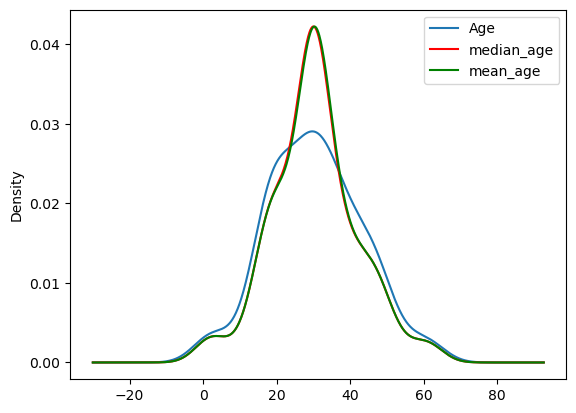

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)
# variable imputed with the median
x_train['median_age'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
x_train['mean_age'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

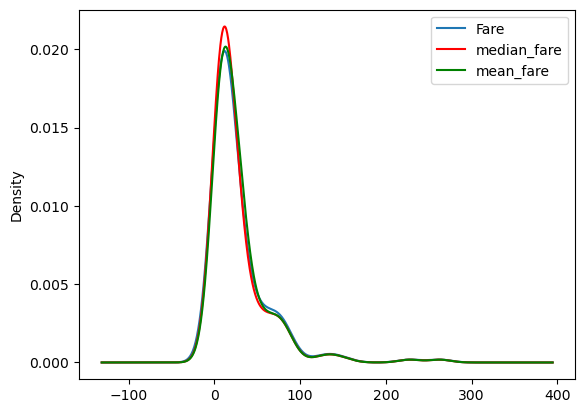

In [61]:
fig =plt.figure()
ax= fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['median_fare'].plot(kind='kde',ax=ax, color='red')
x_train['mean_fare'].plot(kind='kde',ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

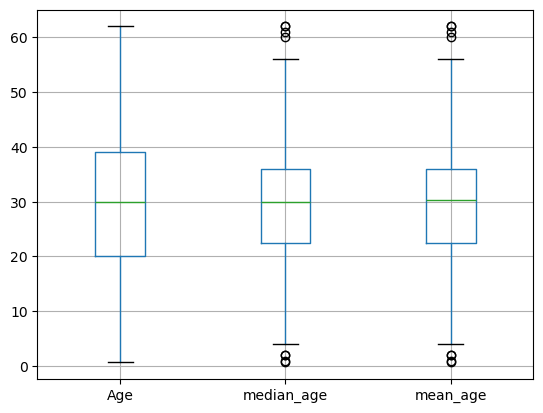

In [65]:
x_train[['Age','median_age','mean_age']].boxplot()

<Axes: >

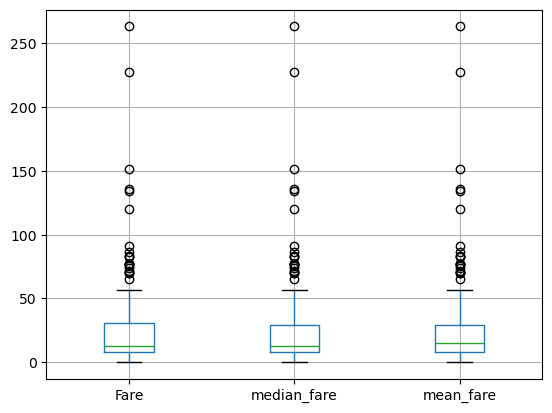

In [67]:
x_train[['Fare','median_fare','mean_fare']].boxplot()

<H1>SKlearn</H1>

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [82]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [86]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [89]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [93]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [99]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])